In [1406]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1407]:
train = pd.read_csv( "./DataSet/train.csv" )
test = pd.read_csv( "./DataSet/test.csv" )

In [1408]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [1409]:
# train.head()

In [1410]:
# train["Survived"].value_counts( )
train["Survived"].value_counts( normalize=True )

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [1411]:
# sns.countplot( train["Survived"] )

# PClass

In [1412]:
train["Survived"].groupby( train["Pclass"] ).mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [1413]:
train[[ "Pclass" , "Survived"] ].groupby(["Pclass"])\
.agg( { "Pclass":"size" ,"Survived":"mean"} )\
.rename( columns = {"Pclass":"mCount"})\
.reset_index()

,Pclass,mCount,Survived
0,1,216,0.629630
1,2,184,0.472826
2,3,491,0.242363


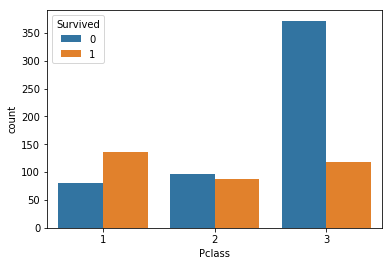

In [1414]:
sns.countplot( train["Pclass"] , hue=train["Survived"] )

# Name

In [1415]:
train["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [1416]:
train["Name_Title"] = train["Name"].apply( lambda x: x.split(',')[1] )\
.apply( lambda x:x.split()[0] )

train["Name_Title"].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Col.           2
Mlle.          2
Capt.          1
Jonkheer.      1
Ms.            1
Sir.           1
Mme.           1
Don.           1
the            1
Lady.          1
Name: Name_Title, dtype: int64

In [1417]:
train[["Name_Title","Survived"] ].groupby( train["Name_Title"] )\
.agg( { "Name_Title":"size" , "Survived":"mean" } )\
.rename( columns={"Name_Title":"mCount"} )\
.reset_index()

,Name_Title,mCount,Survived
0,Capt.,1,0.000000
1,Col.,2,0.500000
2,Don.,1,0.000000
3,Dr.,7,0.428571
4,Jonkheer.,1,0.000000
5,Lady.,1,1.000000
6,Major.,2,0.500000
7,Master.,40,0.575000
8,Miss.,182,0.697802
9,Mlle.,2,1.000000


In [1418]:
train["Name_Len"] = train["Name"].apply( lambda x: len(x) )
train[ "Survived" ].groupby( pd.qcut( train["Name_Len"] , 5 ) )\
.agg( { "Name_Len":"size", "Survived":"mean"} )\
.rename( columns={"Name_Len":"mCount" } )\
.reset_index()

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,Name_Len,mCount,Survived
0,"(11.999, 19.0]",204,0.220588
1,"(19.0, 23.0]",156,0.301282
2,"(23.0, 27.0]",197,0.319797
3,"(27.0, 32.0]",165,0.442424
4,"(32.0, 82.0]",169,0.674556


# Sex

In [1419]:
# train["Sex"].value_counts()
train["Sex"].value_counts( normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [1420]:
train[ ["Sex" , "Survived"] ].groupby( ["Sex"])\
.agg( { "Sex":"size" , "Survived":"mean" } )\
.rename( columns = { "Sex":"mCount" } )\
.reset_index()

,Sex,mCount,Survived
0,female,314,0.742038
1,male,577,0.188908


# Age

In [1421]:
# train[ ["Age" , "Survived"] ].groupby( ["Age"])\
# .agg( { "Age":"size" , "Survived":"mean" } )\
# .rename( columns = { "Age":"mCount" } )\
# .reset_index()

In [1422]:
train[ ["Age" , "Survived"] ].groupby( train["Age"].isnull() )\
.agg( { "Age":"size" , "Survived":"mean" } )\
.rename( columns = { "Age":"mCount" } )\
.reset_index()

,Age,mCount,Survived
0,False,714,0.406162
1,True,177,0.293785


In [1423]:
train[ ["Age" , "Survived"] ].groupby( pd.qcut(train["Age"],5) )\
.agg( { "Age":"size" , "Survived":"mean" } )\
.rename( columns = { "Age":"mCount" } )\
.reset_index()

,Age,mCount,Survived
0,"(0.419, 19.0]",164,0.481707
1,"(19.0, 25.0]",137,0.328467
2,"(25.0, 31.8]",127,0.393701
3,"(31.8, 41.0]",144,0.437500
4,"(41.0, 80.0]",142,0.373239


# SibSP

In [1424]:
train[ ["SibSp" , "Survived"] ].groupby(train["SibSp"] )\
.agg( { "SibSp":"size" , "Survived":"mean" } )\
.rename( columns = { "SibSp":"mCount" } )\
.reset_index()

,SibSp,mCount,Survived
0,0,608,0.345395
1,1,209,0.535885
2,2,28,0.464286
3,3,16,0.250000
4,4,18,0.166667
5,5,5,0.000000
6,8,7,0.000000


# Parch

In [1425]:
train[ ["Parch" , "Survived"] ].groupby(train["Parch"] )\
.agg( { "Parch":"size" , "Survived":"mean" } )\
.rename( columns = { "Parch":"mCount" } )\
.reset_index()

,Parch,mCount,Survived
0,0,678,0.343658
1,1,118,0.550847
2,2,80,0.500000
3,3,5,0.600000
4,4,4,0.000000
5,5,5,0.200000
6,6,1,0.000000


# Ticket

In [1426]:
# train[ ["Ticket" , "Survived"] ].groupby(train["Ticket"] )\
# .agg( { "Ticket":"size" , "Survived":"mean" } )\
# .rename( columns = { "Ticket":"mCount" } )\
# .reset_index()

In [1427]:
train['Ticket_Len'] = train['Ticket'].apply(lambda x: len(x))

In [1428]:
train[ ["Ticket_Len" , "Survived"] ].groupby(train["Ticket_Len"] )\
.agg( { "Ticket_Len":"size" , "Survived":"mean" } )\
.rename( columns = { "Ticket_Len":"mCount" } )\
.reset_index()

,Ticket_Len,mCount,Survived
0,3,2,0.000000
1,4,101,0.366337
2,5,131,0.618321
3,6,419,0.319809
4,7,27,0.296296
5,8,76,0.539474
6,9,26,0.192308
7,10,41,0.341463
8,11,8,0.250000
9,12,10,0.400000


In [1429]:
train['Ticket_Lett'] = train['Ticket'].apply(lambda x: str(x)[0])

In [1430]:
train['Ticket_Lett'].value_counts()

3    301
2    183
1    146
S     65
P     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: Ticket_Lett, dtype: int64

In [1431]:
train[ ["Ticket_Lett" , "Survived"] ].groupby(train["Ticket_Lett"] )\
.agg( { "Ticket_Lett":"size" , "Survived":"mean" } )\
.rename( columns = { "Ticket_Lett":"mCount" } )\
.reset_index()

,Ticket_Lett,mCount,Survived
0,1,146,0.630137
1,2,183,0.464481
2,3,301,0.239203
3,4,10,0.200000
4,5,3,0.000000
5,6,6,0.166667
6,7,9,0.111111
7,8,2,0.000000
8,9,1,1.000000
9,A,29,0.068966


# Fare

In [1432]:
train[ ["Fare" , "Survived"] ].groupby(  pd.qcut(train["Fare"] , 3) )\
.agg( { "Fare":"size" , "Survived":"mean" } )\
.rename( columns = { "Fare":"mCount" } )\
.reset_index()

,Fare,mCount,Survived
0,"(-0.001, 8.662]",308,0.198052
1,"(8.662, 26.0]",288,0.402778
2,"(26.0, 512.329]",295,0.559322


In [1433]:
pd.crosstab(pd.qcut(train['Fare'], 5), columns=train['Pclass'])

Pclass,1,2,3
Fare,,,
"(-0.001, 7.854]",6,6,167
"(7.854, 10.5]",0,24,160
"(10.5, 21.679]",0,80,92
"(21.679, 39.688]",64,64,52
"(39.688, 512.329]",146,10,20


# Cabin

##  Cabin_Letter

In [1434]:
train['Cabin_Letter'] = train['Cabin'].apply(lambda x: str(x)[0])

In [1435]:
train[ ["Cabin_Letter" , "Survived"] ].groupby( train["Cabin_Letter"] )\
.agg( { "Cabin_Letter":"size" , "Survived":"mean" } )\
.rename( columns = { "Cabin_Letter":"mCount" } )\
.reset_index()

,Cabin_Letter,mCount,Survived
0,A,15,0.466667
1,B,47,0.744681
2,C,59,0.593220
3,D,33,0.757576
4,E,32,0.750000
5,F,13,0.615385
6,G,4,0.500000
7,T,1,0.000000
8,n,687,0.299854


## Cabin Number

In [1436]:
train['Cabin_num'] = train['Cabin'].apply(lambda x: str(x).split(' ')[-1][1:])
train['Cabin_num'].replace('an', np.NaN, inplace = True)
train['Cabin_num'] = train['Cabin_num'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)

In [1437]:
train[ ["Cabin_num" , "Survived"] ].groupby( pd.qcut( train["Cabin_num"],3) )\
.agg( { "Cabin_num":"size" , "Survived":"mean" } )\
.rename( columns = { "Cabin_num":"mCount" } )\
.reset_index()

,Cabin_num,mCount,Survived
0,"(1.999, 28.667]",67,0.716418
1,"(28.667, 65.667]",66,0.651515
2,"(65.667, 148.0]",67,0.641791


In [1438]:
train['Survived'].corr(train['Cabin_num'])

-0.06384595922789364

# Embarked

In [1439]:
train[ ["Embarked" , "Survived"] ].groupby( train["Embarked"] )\
.agg( { "Embarked":"size" , "Survived":"mean" } )\
.rename( columns = { "Embarked":"mCount" } )\
.reset_index()

,Embarked,mCount,Survived
0,C,168,0.553571
1,Q,77,0.389610
2,S,644,0.336957


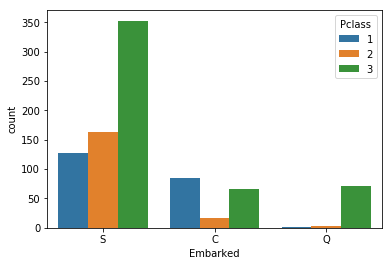

In [1440]:
sns.countplot( train["Embarked"] ,hue=train["Pclass"] )

# Feature Engineering

In [1441]:
def names(train, test):
    for i in [train, test]:
        i['Name_Len'] = i['Name'].apply(lambda x: len(x))
        i['Name_Title'] = i['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
        del i['Name']
    return train, test

In [1442]:
def age_impute(train, test):
    for i in [train, test]:
        i['Age_Null_Flag'] = i['Age'].apply(lambda x: 1 if pd.isnull(x) else 0)
        data = train.groupby(['Name_Title', 'Pclass'])['Age']
        i['Age'] = data.transform(lambda x: x.fillna(x.mean()))
    return train, test

In [1443]:
def fam_size(train, test):
    for i in [train, test]:
        i['Fam_Size'] = np.where( (i['SibSp']+i['Parch'] ) == 0 , 'Solo',
                           np.where( (i['SibSp']+i['Parch'] )  <= 3,'Nuclear', 'Big' ) )
        del i['SibSp']
        del i['Parch']
    return train, test


def fam_size12(train, test):
    for i in [train, test]:
        i['Fam_Size'] = np.where(  (i['SibSp']+i['Parch'] ) == 0  , 0,
                            np.where( ( (i['SibSp']+i['Parch']>= 1)& (i['SibSp']+i['Parch'] <= 3) ) , 1 ,2))
        del i['SibSp']
        del i['Parch']
    return train, test

In [1444]:
train[ ["SibSp" , "Survived"] ].groupby(train["SibSp"] )\
.agg( { "SibSp":"size" , "Survived":"mean" } )\
.rename( columns = { "SibSp":"mCount" } )\
.reset_index()

,SibSp,mCount,Survived
0,0,608,0.345395
1,1,209,0.535885
2,2,28,0.464286
3,3,16,0.250000
4,4,18,0.166667
5,5,5,0.000000
6,8,7,0.000000


In [1445]:
# train[ ["Parch" , "Survived"] ].groupby(train["Parch"] )\
# .agg( { "Parch":"size" , "Survived":"mean" } )\
# .rename( columns = { "Parch":"mCount" } )\
# .reset_index()

# train["Fam_Size"] = train["Parch"] + train["SibSp"]
# train[ ["Fam_Size" , "Survived"] ].groupby(train["Fam_Size"] )\
# .agg( { "Fam_Size":"size" , "Survived":"mean" } )\
# .rename( columns = { "Fam_Size":"mCount" } )\
# .reset_index()


In [1446]:
def fam_size2(train, test):
    for i in [train, test]:
        i['Sib_Size'] = np.where( i['SibSp'] == 0 , 'zero',
                                 np.where( ( (i['SibSp']>=1) & (i['SibSp'] <= 2)),'one',
                                          np.where( ( (i['SibSp']>=3) & (i["SibSp"]<=4) ) , "two", "three") ) )
        del i['SibSp']
    return train, test
def fam_size3(train, test):
    for i in [train, test]:
        i['Parch_Size'] = np.where( i['Parch'] == 0 , 'zero',
                           np.where( ((1<=i['Parch'])&(i['Parch'] <= 3) ),'one', 'two' ) ) 
        del i['Parch']
    return train, test


In [1447]:
def ticket_grouped(train, test):
    for i in [train, test]:
        i['Ticket_Lett'] = i['Ticket'].apply(lambda x: str(x)[0])
        i['Ticket_Lett'] = i['Ticket_Lett'].apply(lambda x: str(x))
        i['Ticket_Lett'] = np.where((i['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), i['Ticket_Lett'],
                                   np.where((i['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']),
                                            'Low_ticket', 'Other_ticket'))
        i['Ticket_Len'] = i['Ticket'].apply(lambda x: len(x))
        del i['Ticket']
    return train, test

In [1448]:
def cabin(train, test):
    for i in [train, test]:
        i['Cabin_Letter'] = i['Cabin'].apply(lambda x: str(x)[0])
        del i['Cabin']
    return train, test

In [1449]:
def cabin_num(train, test):
    for i in [train, test]:
        i['Cabin_num1'] = i['Cabin'].apply(lambda x: str(x).split(' ')[-1][1:])
        i['Cabin_num1'].replace('an', np.NaN, inplace = True)
        i['Cabin_num1'] = i['Cabin_num1'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)
        i['Cabin_num'] = pd.qcut(train['Cabin_num1'],3)
    train = pd.concat((train, pd.get_dummies(train['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
    test = pd.concat((test, pd.get_dummies(test['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
    del train['Cabin_num']
    del test['Cabin_num']
    del train['Cabin_num1']
    del test['Cabin_num1']
    return train, test

In [1450]:
def embarked_impute(train, test):
    for i in [train, test]:
        i['Embarked'] = i['Embarked'].fillna('S')
    return train, test

In [1451]:
test['Fare'].fillna(train['Fare'].mean(), inplace = True)

In [1452]:
# def dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked', 'Ticket_Lett', 'Cabin_Letter', 'Name_Title', 'Fam_Size']):
def dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked', 'Ticket_Lett', 'Cabin_Letter', 'Name_Title', 'Sib_Size','Parch_Size']):
    for column in columns:
        train[column] = train[column].apply(lambda x: str(x))
        test[column] = test[column].apply(lambda x: str(x))
        good_cols = [column+'_'+i for i in train[column].unique() if i in test[column].unique()]
        train = pd.concat((train, pd.get_dummies(train[column], prefix = column)[good_cols]), axis = 1)
        test = pd.concat((test, pd.get_dummies(test[column], prefix = column)[good_cols]), axis = 1)
        del train[column]
        del test[column]
    return train, test

In [1453]:
def drop(train, test, bye = ['PassengerId']):
    for i in [train, test]:
        for z in bye:
            del i[z]
    return train, test

In [1454]:
train = pd.read_csv( "./DataSet/train.csv" )
test = pd.read_csv( "./DataSet/test.csv" )
train, test = names(train, test)
train, test = age_impute(train, test)
train, test = cabin_num(train, test)
train, test = cabin(train, test)
train, test = embarked_impute(train, test)
# train, test = fam_size(train, test)

train, test = fam_size2(train, test)
train, test = fam_size3(train, test)

train.head()

test['Fare'].fillna(train['Fare'].mean(), inplace = True)
train, test = ticket_grouped(train, test)
train, test = dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked', 'Ticket_Lett',
                                                                     'Cabin_Letter', 'Name_Title', 'Sib_Size','Parch_Size'])
# train, test = dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked', 'Ticket_Lett',
#                                                                      'Cabin_Letter','Name_Title','Fam_Size'])
train, test = drop(train, test)

In [1455]:
print(len(train.columns))

49


In [1456]:
train.head()

,Survived,Age,Fare,Name_Len,Age_Null_Flag,"Cabin_num_(1.999, 28.667]","Cabin_num_(28.667, 65.667]","Cabin_num_(65.667, 148.0]",Ticket_Len,Pclass_3,...,Name_Title_Dr.,Name_Title_Ms.,Name_Title_Col.,Sib_Size_one,Sib_Size_zero,Sib_Size_two,Sib_Size_three,Parch_Size_zero,Parch_Size_one,Parch_Size_two
0,0,22.0,7.2500,23,0,0,0,0,9,1,...,0,0,0,1,0,0,0,1,0,0
1,1,38.0,71.2833,51,0,0,0,1,8,0,...,0,0,0,1,0,0,0,1,0,0
2,1,26.0,7.9250,22,0,0,0,0,16,1,...,0,0,0,0,1,0,0,1,0,0
3,1,35.0,53.1000,44,0,0,0,1,6,0,...,0,0,0,1,0,0,0,1,0,0
4,0,35.0,8.0500,24,0,0,0,0,6,1,...,0,0,0,0,1,0,0,1,0,0


# Hyperparameter Tuning

In [1457]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("%.4f" % rf.oob_score_)

0.8339


In [1458]:
pd.concat((pd.DataFrame(train.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
12,Sex_female,0.112199
11,Sex_male,0.110919
33,Name_Title_Mr.,0.105753
1,Fare,0.087985
2,Name_Len,0.084946
0,Age,0.079017
8,Pclass_3,0.042985
35,Name_Title_Miss.,0.033462
34,Name_Title_Mrs.,0.031032
25,Cabin_Letter_n,0.030246


In [1459]:
predictions = rf.predict(test)
predictions = pd.DataFrame(predictions, columns=['Survived'])
test = pd.read_csv( "./DataSet/test.csv" )
predictions = pd.concat((test.iloc[:, 0], predictions), axis = 1)
predictions.to_csv('y_test18.csv', sep=",", index = False)